Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 8**: Consider a set of coupled first-order differential equations, typically called 'rate equations'. Let the two ODE's be $$\frac{dy_{1}}{dt}=-k_{1}\,y_{1}$$ and $$\frac{dy_{2}}{dt}=k_{1}\,y_{1} - k_{2}\,y_{2}$$ where $k_{1,2}$ are rate constants. 

**Data**: Take $k_{1}=0.2$ s$^{-1}$ and $k_{2}=0.8$ s$^{-1}$. Initial conditions shall be $y_{1}(0)=100$ and $y_{2}(0)=0$. 

**Task**: Write a function `rateEqns(init, time, k1, k2)` with the array of initial conditions, the time array and the rate constants $k_{1}$ and $k_{2}$ as input. Let the function solve the rate equation ODE's and return the full `odeint` output.

Plot the solutions (with different markers) with suitable axes labels, a legend and a title. Also include a plot of loss feed, i.e. $L(t) = y_{1}(0) - y_{1}(t) - y_{2}(t)$.

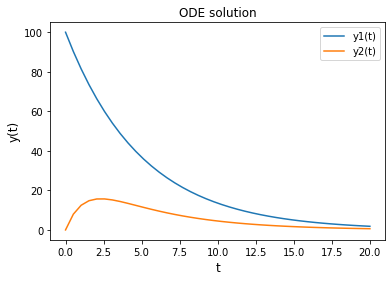

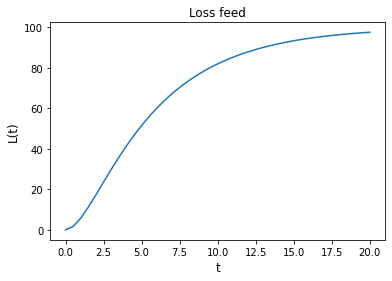

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def coupled(y,t,k1,k2):
    dy1 = -k1 * y[0]
    dy2 = -dy1 - k2 * y[1]
    return np.array([dy1,dy2])

k1 = 0.2
k2 = 0.8
y10 = 100
y20 = 0
init = np.array([y10,y20])
time = np.linspace(0, 20, 40)

def rateEqns(init, time, k1, k2):
    return odeint(coupled, init, time, args = (k1,k2))

ans = rateEqns(init, time, k1, k2)
y1t,y2t = np.hsplit(ans,2)
plt.title("ODE solution")
plt.plot(time, y1t, label="y1(t)")
plt.plot(time, y2t, label="y2(t)")
plt.ylabel('y(t)', fontsize=12)
plt.xlabel('t', fontsize=12)
plt.legend()
plt.show()

Lt = y1t[0] - y1t - y2t
plt.title("Loss feed")
plt.plot(time, Lt)
plt.ylabel('L(t)', fontsize=12)
plt.xlabel('t', fontsize=12)
plt.show()

In [2]:
# Test cell
k1 = 0.2
k2 = 0.8
y10 = 100
y20 = 0
time = np.linspace(0, 20, 40)
init = np.array([y10, y20])
answer = rateEqns(init, time, k1, k2)
# 1
loss = y10 - answer[:,0] - answer[:,1]
assert (loss[10]>52.0 and loss[10]<53.0), 'wrong loss value'

In [3]:
# Test cell
assert (answer[1,0]>90.0 and answer[1,0]<90.4), 'wrong solution value'
assert (answer[1,1]>7.9 and answer[1,1]<8.0), 'wrong solution value'

### Tests 3 marks; Style 1 mark; Plot - 3 marks